# Unsupervised Machine Learning: What is K-Means Clustering?

K-Means Clustering is a type of unsupervised machine learning that groups data on the basis of similarities. Recall that in supervised machine learning we provide the algorithm with features, or variables that we would like it to associate with labels, or the outcome in which we would like it to predict or classify. In unsupervised machine learning we only provide the model with features and it then "learns" the associations on its own.

K-Means is one technique for finding subgroups within datasets. One difference in K-Means versus that of other clustering methods is that in K-Means, we have a predetermined amount of clusters and some other techniques do not require that we predefine the amount of clusters. The algorithm begins by randomly assigning each data point to a specific cluster with no one data point being in any two clusters. It then calculates the centroid, or mean of these points. The object of the algorithm is to reduce the total within-cluster variation. In other words, we want to place each point into a specific cluster, measure the distances from the centroid of that cluster and then take the squared sum of these to get the total within-cluster variation. Our goal is to reduce this value. The process of assigning data points and calculating the squared distances is continued until there are no more changes in the components of the clusters, or in other words, we have optimally reduced the in cluster variation.

Let's take a look at how K-Means works.



We will begin by importing our usual data analysis and manipulation libraries. Sci-kit learn offers built-in datasets that you can play with to get familiar with various algorithms. You can take a look at some of the datasets provided by sklearn here:http://scikit-learn.org/stable/datasets/index.html To gain an understanding of how K-Means works, we're going to create our own toy data and visualize the clusters. Then we will use sklearn's KMeans algorithm to assess it's ability to identify the clusters that we created.

Let's get started!



In [2]:
#importing necessary libraries
#data analysis and manipulation libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning libraries
#the below line is for making fake data for illustration purposes
from sklearn.datasets import make_blobs


Now that we have imported our data analysis, visualization and the make_blobs method from sklearn, we're ready to create our toy data to begin our analysis.



In [3]:
#creating fake data
data=make_blobs(n_samples=500, n_features=8,centers=5, cluster_std=1.5, random_state=201)

In the above line of code, we have created a variable named data and have initialized it using our make_blobs object imported from sklearn. The make blobs object allows us to create and specify the parameters associated with the data we're going to create. We're able to assign the number of samples, or the amount of observations equally divided between clusters, the number of features, clusters, cluster standard deviation, and a random state. Using the centers variable, we can determine the amount of clusters that we want to create from our toy data.

Now that we have initialized our method, let's take a look at our data



In [4]:
#let's take a look at our fake data
data[0] #produces an array of our samples

array([[-8.71704845,  5.41481685,  0.80079153, ..., -6.75272811,
        -5.35441615, -7.54472844],
       [-6.69742504, -9.36091046,  4.76952742, ...,  4.50267649,
        -8.65187746,  7.32045219],
       [-8.24498976,  3.41616552,  0.59957377, ..., -6.06843425,
        -5.44945023, -7.63414447],
       ...,
       [-6.39216053, -3.36795039, 10.45021989, ..., -1.04434723,
        -5.1316052 ,  3.76141109],
       [ 6.00389682,  6.66533498, -3.59987442, ..., -1.64244834,
         6.9089689 , -4.24161932],
       [10.55759534,  5.59483822, -4.07524866, ..., -1.38497719,
         8.43095575, -1.08873693]])

Printing data[0] returns an array of our samples. These are the toy data points we created when initializing the n_samples parameter in our make_blobs object. We can also view the cluster assignments we created

In [5]:
#viewing the clusters of our data
data[1]

array([0, 1, 0, 2, 2, 3, 0, 4, 3, 3, 4, 3, 1, 2, 3, 0, 4, 4, 2, 4, 2, 1,
       4, 1, 2, 1, 2, 1, 4, 2, 1, 4, 0, 4, 2, 3, 4, 1, 0, 0, 3, 3, 1, 2,
       4, 2, 4, 3, 1, 3, 1, 4, 0, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0, 3, 4, 4,
       2, 2, 4, 3, 0, 0, 1, 4, 3, 4, 1, 3, 4, 3, 2, 0, 4, 1, 0, 4, 0, 4,
       4, 2, 3, 4, 1, 4, 0, 3, 0, 4, 3, 2, 4, 2, 1, 3, 0, 2, 2, 0, 2, 2,
       2, 1, 4, 4, 4, 2, 2, 0, 2, 0, 4, 2, 1, 0, 3, 0, 2, 2, 3, 2, 0, 1,
       2, 1, 0, 2, 1, 0, 3, 2, 1, 1, 0, 1, 0, 3, 0, 0, 3, 2, 2, 4, 2, 4,
       1, 2, 1, 2, 4, 1, 1, 4, 3, 0, 0, 1, 1, 0, 4, 1, 2, 1, 4, 4, 3, 4,
       1, 0, 1, 1, 1, 1, 0, 4, 4, 4, 1, 0, 4, 3, 4, 2, 2, 4, 3, 3, 1, 3,
       0, 3, 0, 0, 4, 1, 4, 3, 3, 0, 4, 0, 3, 2, 0, 4, 3, 4, 1, 2, 4, 1,
       4, 1, 3, 3, 4, 2, 3, 2, 2, 3, 1, 4, 1, 1, 0, 3, 2, 4, 0, 4, 0, 0,
       0, 4, 2, 4, 2, 0, 1, 0, 1, 3, 4, 4, 4, 3, 1, 4, 1, 4, 2, 4, 3, 0,
       1, 3, 1, 3, 0, 0, 2, 3, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3,
       2, 4, 1, 2, 0, 0, 1, 3, 4, 0, 1, 4, 3, 3, 0,

Printing data[1] allows us to view the clusters created. Note that though we specified five clusters in our initialization, our cluster assignments range from 0 to 4. This is because python indexing begins at 0 and not 1. So cluster counting, so to speak, begins at 0 and continues for five steps.

We've taken a look at our data and viewed our clusters, but looking at arrays doesn't give us a lot of information. This is where our visualization libraries come in. Python's matplotlib is a great library for visualizing data so that we can make inferences about it. Let's create a scatter plot, or a visual to identify the relationships inherent in our data.

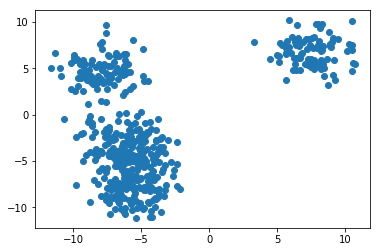

In [6]:
#creating a scatter plot of our data in features 1 and 2
plt.scatter(data[0][:,0],data[0][:,1])

The above plot gives us a little more information. Not to mention it's easier to read. We have created a scatter plot of our sample data using the first two features we created. We can somewhat see that there are some distinct clusters. The group to the upper right of the chart is the most distinct. There is also a degree of separation in the data to the left of the chart. But, didn't we assign five clusters to our data? We can't visually see the five clusters yet, but we know that they're there.

### One way that we can improve our visualization is to color it by the clusters we created.

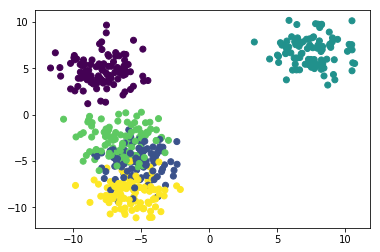

In [7]:
#the above plot doesn't give us much information
#let's recreate it using our clusters
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])

The above plot is a further improvement. We can now see that the grouping to the lower left of our original plot was actually multiple overlapping clusters. What would make this visualization even better is if we added more distinct colors that would allow us to identify the specific points in each cluster. We can do this by adding another parameter to our scatter plot called cmap. The cmap parameter will allow us to set a color mapping built into matplotlib to recolor our data based on our clusters. To learn more about matplotlib's colormapping you can visit the following link: https://matplotlib.org/examples/color/colormaps_reference.html

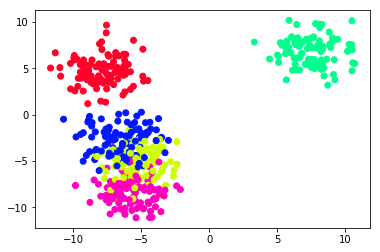

In [8]:
#we can improve the above visualization by adding a color map to our plot
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')

To review, at this point, we have created some toy data using sklearn's built in make_blobs method. We then viewed the rows of the first two features, followed by the actual clusters of our toy data. Next, we plotted our data both with and without coloring based on the clusters.

To display how K-Means is implemented, we can now create the K-Means object and fit it to our toy data and compare the results.



In [9]:
#importing K-Means
from sklearn.cluster import KMeans

Each time that we import a model in sklearn, to use it, we must create an instance of it. The models are objects and thus we create an instance of the object and specify the parameters for our specific object. Naturally, this allows us to create a variety of different models, each with different specifications for our analysis. In this example we'll create a single instance of the K-Means object and specify the number of clusters.

In [10]:
#instantiating kmeans
model=KMeans(n_clusters=5) #n_clusters represents # of clustrers; we know this because we created this dataset

In practice, determining the number of clusters isn't so straight foward. However, given the fact that we created this data ourselves, we are aware of how many clusters exist in the data and set the number of clusters for our model to five.

Once we have created an instance of the K-Means algorithm, we are now ready to fit it to our data. During this step, we are applying our model to our data. The model, based on the parameters that we specifiy, will attempt to conform the data to those constraints. Since we set our model's clusters equal to five, by fitting it on our data, our model is going to attempt to create five clusters from our data.

In [11]:
#fitting our KMeans algorithm to our data
model.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In the above line of code, we have now fitted our model to our data. We can see that it confirms the parameters our model applied to our data. Next, now that we have both our toy data and have visualized the clusters we created, we can compare the clusters we created from our toy data to the one's that our K-Means algorithm created based on viewing our data. We'll code a visualization similar to the one we created earlier however, instead of a single plot, we will use matplotlibs subplot method to create two plots, our clusters and K-Means clusters, that can be viewed side by side for analysis. If you would like to learn more about matplotlibs subplot functionality, you can visit the following link: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplot.html

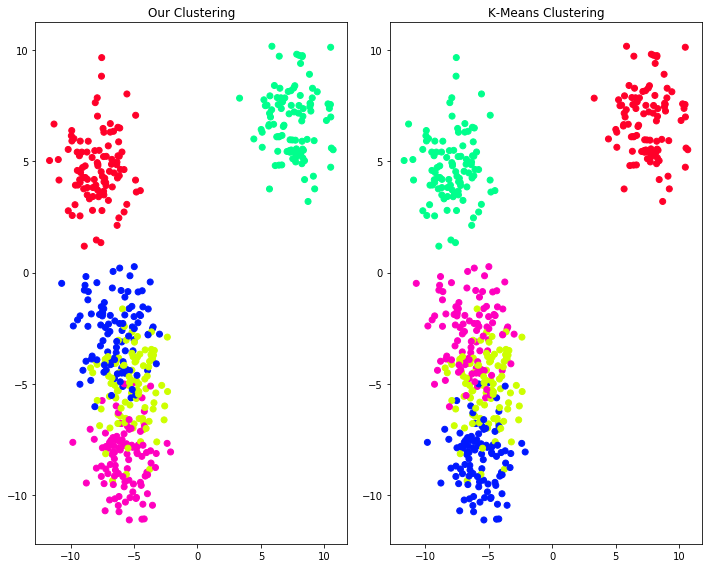

In [12]:
#now we can compare our clustered data to that of kmeans
#creating subplots

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')
#in the above line of code, we are simply replotting our clustered data
#based on already knowing the labels(i.e. c=data[1])
plt.title('Our Clustering')
plt.tight_layout()

plt.subplot(122)
plt.scatter(data[0][:,0],data[0][:,1],c=model.labels_,cmap='gist_rainbow')
#notice that the above line of code differs from the first in that 
#c=model.labels_ instead of data[1]...this means that we will be plotting
#this second plot based on the clusters that our model predicted
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

The above plots show that the K-Means algorithm was able to identify the clusters within our data. The coloring has no bearing on the clusters and is merely a way to distinguish clusters. In practice, we won't have the actual clusters that our data belongs to and thus we wouldn't be able to compare the clusters of K-Means to prior clusters; But what this walkthrough shows is the ability of K-Means to identify the prescense of subgroups within data.